# Проект "Авиарейсы без потерь"

## Описание данных
| ## | Column Name      | Type.    | Description |
| -: | ---------------- |----------| :---------------- |
| 0  | flight_id        | int64    | Иденификатор рейса |
| 1  | flight_no        | object   | Номер рейса |
| 2  | arrival_airport  | object   | Аэропорт прибытия |
| 3  | longitude        | float64  | Координаты аэропорта (долгота) |
| 4  | latitude         | float64  | Координаты аэропорта (широта) |
| 5  | model            | object   | Модель самолёта |
| 6  | actual_arrival   | object   | Фактическое время прилёта |
| 7  | actual_departure | object   | Фактическое время вылёта |
| 8  | fare_economy     | int64    | Кол-во проданных билетов кл.“Эконом” |
| 9  | fare_comfort     | int64    | Кол-во проданных билетов кл.“Комфорт” |
| 10 | fare_business    | int64    | Кол-во проданных билетов кл.“Бизнес” |
| 11 | total_sold       | int64    | Общее кол-во проданных билетов |
| 12 | plane_capacity   | int64    | Максимальная загрузка самолёта |
| 13 | flight_duration  | float64  | Продолжительность полёта в мин. |
| 14 | total_amount     | float64  | Суммарная выручка от продажи билетов |

In [152]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7098 sha256=90e8cec969908f6fa9c14efa7036d38fe29afb078ebd9e372229d6828b74be10
  Stored in directory: /Users/alexey/Library/Caches/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


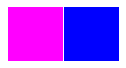

In [153]:
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, radians, asin

from adjustText import adjust_text
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline


# Определяем цвета для разных графиков
colors = ['Magenta', 'Blue']
sns.palplot(sns.color_palette(colors))

# Первичный анализ данных

In [69]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

flights = pd.read_csv('module_4.csv')
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_comfort,fare_business,total_sold,plane_capacity,flight_duration,total_amount
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01T10:17:00Z,2017-01-01T09:27:00Z,84,0,12,96,97,50.0,759000.0
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01T11:47:00Z,2017-01-01T10:09:00Z,93,0,11,104,130,98.0,1542000.0
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02T10:18:00Z,2017-01-02T09:28:00Z,73,0,9,82,97,50.0,632400.0
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02T11:46:00Z,2017-01-02T10:07:00Z,101,0,9,110,130,99.0,1568800.0
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03T10:19:00Z,2017-01-03T09:29:00Z,72,0,9,81,97,50.0,626100.0


In [70]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         118 non-null    int64  
 1   flight_no         118 non-null    object 
 2   arrival_airport   118 non-null    object 
 3   longitude         118 non-null    float64
 4   latitude          118 non-null    float64
 5   model             118 non-null    object 
 6   actual_arrival    118 non-null    object 
 7   actual_departure  118 non-null    object 
 8   fare_economy      118 non-null    int64  
 9   fare_comfort      118 non-null    int64  
 10  fare_business     118 non-null    int64  
 11  total_sold        118 non-null    int64  
 12  plane_capacity    118 non-null    int64  
 13  flight_duration   118 non-null    float64
 14  total_amount      118 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 14.0+ KB


## fare_comfort колонка
Можно избавиться от оной, так как в данной колонку содержаться одни нули

In [71]:
flights.fare_comfort.value_counts()

0    118
Name: fare_comfort, dtype: int64

In [72]:
flights = flights.drop(['fare_comfort'], axis = 1)

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01T10:17:00Z,2017-01-01T09:27:00Z,84,12,96,97,50.0,759000.0
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01T11:47:00Z,2017-01-01T10:09:00Z,93,11,104,130,98.0,1542000.0
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02T10:18:00Z,2017-01-02T09:28:00Z,73,9,82,97,50.0,632400.0
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02T11:46:00Z,2017-01-02T10:07:00Z,101,9,110,130,99.0,1568800.0
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03T10:19:00Z,2017-01-03T09:29:00Z,72,9,81,97,50.0,626100.0


## actual_departure & actual_arrival

Конвертируем данные в datetime чтобы было удубнее работать
Так-же добовляем колонку дня недели DOW - 'Day Of the Week' - может пригодиться для дальнейшего анализа

In [73]:
flights['actual_departure'] = pd.to_datetime(flights.actual_departure)
flights['actual_arrival'] = pd.to_datetime(flights.actual_arrival)
flights['dow'] = flights.actual_departure.dt.dayofweek
flights['flight_month'] = flights.actual_departure.apply(lambda x: x.month)
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1


In [74]:
# Как видим в декабре из Анапы уже никто, никуда не летит
flights.flight_month.value_counts()

1    62
2    56
Name: flight_month, dtype: int64

In [75]:
flights.dow.value_counts()

6    18
1    18
0    18
5    16
4    16
3    16
2    16
Name: dow, dtype: int64

In [76]:
flights['dow'] = flights.actual_departure.dt.dayofweek
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1


## Заполненность самолёта в %

In [77]:
flights['fill_ratio'] = round(100 * flights.total_sold / flights.plane_capacity, 2)

In [90]:
# Дополнительные данные
# Расчётный расход топлива, кг/ч
fuel_consumption = {'Boeing 737-300': 2600, 
                    'Sukhoi Superjet-100':1700}

# Стоимость ТС-1 (авиационный керосин) в зимние месяцы 2017 года (без НДС), руб/т в аэропорту Анапы
# Источник: https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/?id=7329
fuel_price = {1: 41435, 2:39553, 12:47101}

# Расчет цены авивтоплива за полет
def fuel_cost(row):
    flight_time = row['flight_duration']/60       # время полёта в часах
    fuel_cost_per_kg = row['fuel_price']/1000     # стоимость 1 кг топлива
    fuel_consumption = row['fuel_consumption'] 
    return round(flight_time * fuel_cost_per_kg * fuel_consumption, 2)

flights['fuel_consumption'] = flights.model.map(fuel_consumption)
flights['fuel_price'] = flights.flight_month.map(fuel_price)
flights['fuel_cost'] = flights.apply (lambda row: fuel_cost(row), axis=1)
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month,fill_ratio,fuel_consumption,fuel_price,fuel_cost
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1,98.97,1700,41435,58699.58
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1,80.00,2600,41435,175960.63
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1,84.54,1700,41435,58699.58
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1,84.62,2600,41435,177756.15
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1,83.51,1700,41435,58699.58


## Доходность рейса (выручка за билеты) - (затраты на топливо)

In [105]:
flights['raw_profit'] = flights.total_amount - flights.fuel_cost
flights.head()

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month,fill_ratio,fuel_consumption,fuel_price,fuel_cost,raw_profit
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1,98.97,1700,41435,58699.58,700300.42
1,136420,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1,80.00,2600,41435,175960.63,1366039.37
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1,84.54,1700,41435,58699.58,573700.42
3,136458,PG0252,SVO,37.414600,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1,84.62,2600,41435,177756.15,1391043.85
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1,83.51,1700,41435,58699.58,567400.42


## Направления рейсов arrival_airport
Если посмотреть то в зимние месяцы 2017 года из Анапы были рейсы только по 3 направлениям:
1. Анапа (AAQ) - Москва-Шереметьево (SVO)
2. Анапа (AAQ) - Белгород (EGO)
3. Анапа (AAQ) - Новокузнецк (NOZ)

Рейсы в Новокузнецк исключены из анализа, так как нет данных по продаже билетов.

Остаётся только 2 напрваления. Давайте проверим.

In [106]:
flights.arrival_airport.value_counts()

EGO    59
SVO    59
Name: arrival_airport, dtype: int64

#### Разделим исходный набор данных на два набора данных, разбитых по направлениям.

In [114]:
df_svo = flights[flights.arrival_airport == 'SVO']
df_ego = flights[flights.arrival_airport == 'EGO']
display(df_svo.head(5))
display(df_ego.head(5))

,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month,fill_ratio,fuel_consumption,fuel_price,fuel_cost,raw_profit
1,136420,PG0252,SVO,37.4146,55.972599,Boeing 737-300,2017-01-01 11:47:00+00:00,2017-01-01 10:09:00+00:00,93,11,104,130,98.0,1542000.0,6,1,80.00,2600,41435,175960.63,1366039.37
3,136458,PG0252,SVO,37.4146,55.972599,Boeing 737-300,2017-01-02 11:46:00+00:00,2017-01-02 10:07:00+00:00,101,9,110,130,99.0,1568800.0,0,1,84.62,2600,41435,177756.15,1391043.85
5,136119,PG0252,SVO,37.4146,55.972599,Boeing 737-300,2017-01-03 11:49:00+00:00,2017-01-03 10:08:00+00:00,102,11,113,130,101.0,1653000.0,1,1,86.92,2600,41435,181347.18,1471652.82
7,136159,PG0252,SVO,37.4146,55.972599,Boeing 737-300,2017-01-04 11:45:00+00:00,2017-01-04 10:07:00+00:00,103,12,115,130,98.0,1700600.0,2,1,88.46,2600,41435,175960.63,1524639.37
9,136202,PG0252,SVO,37.4146,55.972599,Boeing 737-300,2017-01-05 11:49:00+00:00,2017-01-05 10:07:00+00:00,89,11,100,130,102.0,1495600.0,3,1,76.92,2600,41435,183142.70,1312457.30


,flight_id,flight_no,arrival_airport,longitude,latitude,model,actual_arrival,actual_departure,fare_economy,fare_business,total_sold,plane_capacity,flight_duration,total_amount,dow,flight_month,fill_ratio,fuel_consumption,fuel_price,fuel_cost,raw_profit
0,136661,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-01 10:17:00+00:00,2017-01-01 09:27:00+00:00,84,12,96,97,50.0,759000.0,6,1,98.97,1700,41435,58699.58,700300.42
2,136936,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-02 10:18:00+00:00,2017-01-02 09:28:00+00:00,73,9,82,97,50.0,632400.0,0,1,84.54,1700,41435,58699.58,573700.42
4,136937,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-03 10:19:00+00:00,2017-01-03 09:29:00+00:00,72,9,81,97,50.0,626100.0,1,1,83.51,1700,41435,58699.58,567400.42
6,136819,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-04 10:19:00+00:00,2017-01-04 09:29:00+00:00,84,12,96,97,50.0,759000.0,2,1,98.97,1700,41435,58699.58,700300.42
8,136645,PG0480,EGO,36.590099,50.643799,Sukhoi Superjet-100,2017-01-05 10:20:00+00:00,2017-01-05 09:29:00+00:00,73,9,82,97,51.0,633000.0,3,1,84.54,1700,41435,59873.57,573126.43


## Посмотрим какие тенденции у нас по дням недели
В понедельник Штирлица повели на расстрел.
"Да, тяжело начинается неделя!" - Подумал Штирлиц.

Как видим Понедельник день тяжёлый не только в анекдоте. Для рейса Анапа-Белгород в понедельник самая низкая средняя доходность и также понедельнику принадлежит антирекорд по выручке.

Для Московского рейса срендяя выручка ниже всего в воскресенье. А антирекорд по выручке так-же принадлежит понедельнику.

In [112]:
print('Средняя выручка от рейса AAQ-SVO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)')
display(round(df_svo.groupby('dow')['raw_profit'].mean().sort_values(ascending=False)/1000, 2))
print('Минимальная выручка от рейса AAQ-SVO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)')
display(round(df_svo.groupby('dow')['raw_profit'].min().sort_values(ascending=False)/1000, 2))

Средняя выручка от рейса AAQ-SVO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)


dow
1    1530.32
4    1520.04
5    1491.85
3    1475.57
0    1449.34
2    1444.91
6    1365.42
Name: raw_profit, dtype: float64

Минимальная выручка от рейса AAQ-SVO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)


dow
4    1340.45
1    1338.05
5    1335.06
3    1286.40
6    1251.45
2    1234.69
0    1218.45
Name: raw_profit, dtype: float64

In [113]:
print('Средняя выручка от рейса AAQ-EGO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)')
display(round(df_ego.groupby('dow')['raw_profit'].mean().sort_values(ascending=False)/1000, 2))
print('Минимальная выручка от рейса AAQ-EGO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)')
display(round(df_ego.groupby('dow')['raw_profit'].min().sort_values(ascending=False)/1000, 2))

Средняя выручка от рейса AAQ-EGO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)


dow
2    695.84
5    660.10
6    650.00
4    649.09
3    641.85
1    640.57
0    636.81
Name: raw_profit, dtype: float64

Минимальная выручка от рейса AAQ-EGO в т.руб по дням недели (0 - Понедельник, 6 - Воскресенье)


dow
2    643.60
6    563.25
5    551.77
4    537.67
1    519.07
3    474.97
0    473.47
Name: raw_profit, dtype: float64

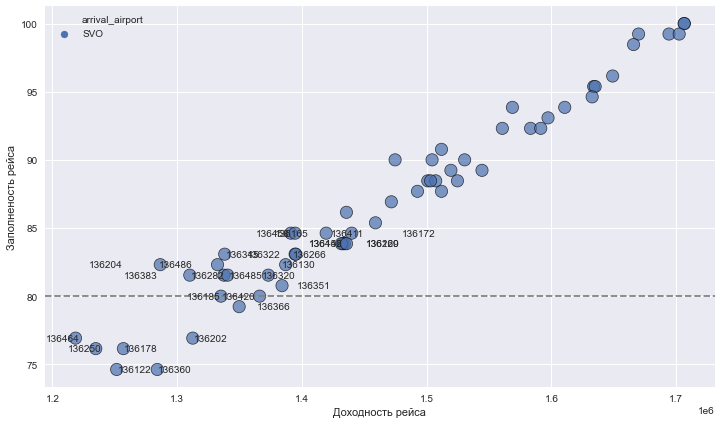

In [195]:
y = df_svo['fill_ratio']
z = df_svo['raw_profit']
n = df_svo['flight_id']
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=z,
                     y=y,
                     data=df_svo,
                     hue='arrival_airport',
                     s=150,
                     alpha=0.7,
                     edgecolor='k')
p1.axhline(80, c=(.5, .5, .5), ls='--')
texts = list()
for i in n.index:
    if y[i] < 85:
        texts.append(ax.text(z[i], y[i], n.loc[i]))
adjust_text(texts,
            ax=ax,
            only_move=dict(points='x', text='x', objects='x'),
            autoalign='x')
p1.set(ylabel='Заполненость рейса', xlabel='Доходность рейса')
plt.rcParams['figure.figsize']=(12,7)
plt.show()

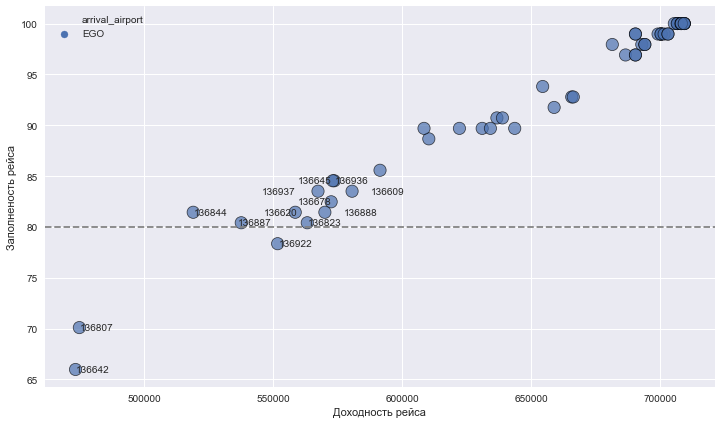

In [196]:
y = df_ego['fill_ratio']
z = df_ego['raw_profit']
n = df_ego['flight_id']
fig, ax = plt.subplots()
p1 = sns.scatterplot(x=z,
                     y=y,
                     data=df_ego,
                     hue='arrival_airport',
                     s=150,
                     alpha=0.7,
                     edgecolor='k')
p1.axhline(80, c=(.5, .5, .5), ls='--')
texts = list()
for i in n.index:
    if y[i] < 85:
        texts.append(ax.text(z[i], y[i], n.loc[i]))
adjust_text(texts,
            ax=ax,
            only_move=dict(points='x', text='x', objects='x'),
            autoalign='x')
p1.set(ylabel='Заполненость рейса', xlabel='Доходность рейса')
plt.rcParams['figure.figsize']=(12,7)
plt.show()

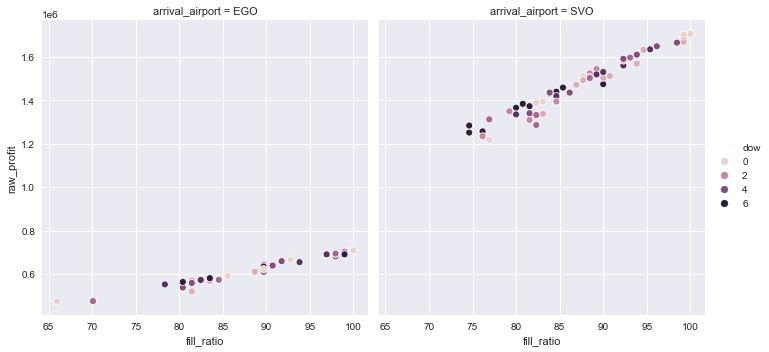

In [192]:
sns.relplot(
    data=flights, x="fill_ratio", y="raw_profit",
    col="arrival_airport", hue="dow",
    kind="scatter"
)